In [16]:
import numpy as np
import matplotlib.pyplot as plt

# ___Linear Regression: Least Squares___
-----------

In [1]:
# Linear models express the target output value in terms of the sum of weighted input variables.

# e.g. If we intend to predict the market value of a house;
# let's say that we are given two features -> age of the house, tax per year

# In general we'd expect a positive correlation between the tax assessment and the market price of the house
# The more valuable the property, the higher its evaluated tax will be.

# And age will likely have a negative correlation with the market value,
# the older the house, lesser the value becomes except for antique places.

In [2]:
# Let's see a dummy example 

## ___House features: tax per year ($X_{tax}$), age in years($X_{age}$)___
## ___$Y_{price}$ = $212,000$ + $(109 \cdot X_{tax})$ - $(2,000 \cdot X_{age})$___

In [9]:
# This linear model will estimate the market price of a house that has an evaluated tax value of 10,000 and 75 years old.
# Predicted selling price will be,

print(f"{212_000 + (109 * 10_000) - (2_000 * 75):3,}")

1,152,000


In [10]:
# This is a made up linear model.
# In reality, when we train linear models, it involves estimating the parameters of the model
# e.g. the constants given in this model (212000, 109 & 2000)

In [11]:
# Linear regression is an example of a linear model.
# In linear regression, there may be multiple input variables (features). -> x_0, x_1, x_2 ... x_n
# Each feature x_i has a corresponding weight w_i
# Predicted output is the weighted sum of inputs + a constant term

___Input variables (features):___
## ___$x~=~(x_0, x_1, x_2, x_3 .... x_n)$___

___Output:___
## ___$\hat{y}~=~\hat{w_0}x_0~+~\hat{w_1}x_1 ... \hat{w_n}x_n~+~\hat{b}$___

___Parameters:___
## ___$\hat{w}~=~\hat{w_0}~+~\hat{w_1}~+~\hat{w_2} ... \hat{w_n}$ &rarr; feature weights or model coefficients___
## ___$\hat{b}$ &rarr; constant bias term or intercept___

In [12]:
# the w_hat and b_hat are estimated from the training data.
# y_hat is estimated from the linear function of test values (input feature values) and the feature weights.

In [13]:
# If we take our housing price example;

# w1_hat is 109
# x1 is 10,000 (tax per year)

# w2_hat is 2,000
# x2 is 75 (age)

# b_hat is 212,000 (start price)

## ___Linear Regression Model with One Feature___
---------------

In [14]:
# Input -> x_0
# Predicted output -> y_hat = w0_hat * x_0 + b_hat
# Model coefficients -> w0_hat (slope), b_hat (intercept)

## ___$\hat{y}~=~\hat{w_0}x_0~+~\hat{b}$___

In [15]:
# This resembles the formula of a straingt line.

In [49]:
x_train = np.random.randint(low = 50, high = 300, size = 100)
y_train = 2 * x_train + np.random.randint(low = -50, high = 50, size = 100)

w0_hat = 1.65134     # one feature -> one weight
b_hat = 43.0831

y_hat0 = (w0_hat * x_train) + b_hat

w0_hat /= 5.53
y_hat1 = (w0_hat * x_train) + b_hat

b_hat += 100
y_hat2 = (w0_hat * x_train) + b_hat

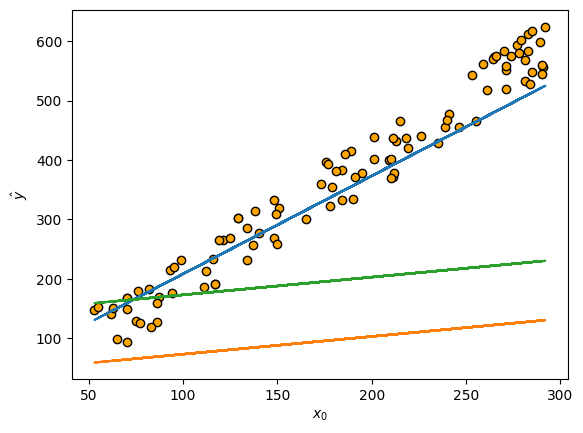

In [50]:
plt.scatter(x_train, y_train, color = "orange", edgecolor = "black")
plt.plot(x_train, y_hat0)
plt.plot(x_train, y_hat1)
plt.plot(x_train, y_hat2)
plt.xlabel("$x_0$")
plt.ylabel("$\hat{y}$")
plt.show()

In [51]:
# In the learning phase, our model has to estimate the w0_hat and b_hat parameters from the training data 
# which will contain x0 values (feature).

In [52]:
# Of the three linear models, the blue one seems to be the best fit.
# Since there aren't many points far above the line or far below the line.

## ___Predictions___

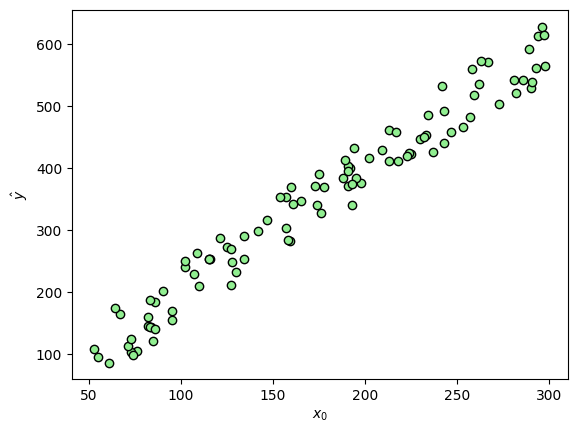

In [72]:
x = np.random.randint(low = 50, high = 300, size = 100)
y_hat = 2 * x + np.random.randint(low = -50, high = 50, size = 100)

plt.scatter(x, y_hat, color = "lightgreen", edgecolor = "black")
plt.xlabel("$x_0$")
plt.ylabel("$\hat{y}$")
plt.show()